In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("../Machine Learning/maze_results.csv")
data.drop('ID', axis=1, inplace=True)
print(data.shape)
data.head(50)


(3267, 9)


,Size,Maze Type,Orientation,Agent Type,Symmetry,Density,Dead Ends,Solution Path Length,Average Episodes
0,"(11, 11)",AldousBroder,Square,Q-Determinative,0.18,0.60,8,20,55
1,"(11, 11)",AldousBroder,Square,Q-Student,0.18,0.60,8,20,31
2,"(11, 11)",AldousBroder,Square,Q-Explorer,0.18,0.60,8,20,159
3,"(11, 11)",AldousBroder,Square,Q-Determinative,0.23,0.60,9,18,50
4,"(11, 11)",AldousBroder,Square,Q-Student,0.23,0.60,9,18,26
5,"(11, 11)",AldousBroder,Square,Q-Explorer,0.23,0.60,9,18,139
6,"(11, 11)",AldousBroder,Square,Q-Determinative,0.14,0.60,6,6,7
7,"(11, 11)",AldousBroder,Square,Q-Student,0.14,0.60,6,6,6
8,"(11, 11)",AldousBroder,Square,Q-Explorer,0.14,0.60,6,6,30
9,"(11, 11)",BinaryTree,Square,Q-Determinative,0.14,0.59,7,8,11


In [4]:
# check data types and null values
print(data.info())

# statistics for numerical columns
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3267 entries, 0 to 3266
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Size                  3267 non-null   object 
 1   Maze Type             3267 non-null   object 
 2   Orientation           3267 non-null   object 
 3   Agent Type            3267 non-null   object 
 4   Symmetry              3267 non-null   float64
 5   Density               3267 non-null   float64
 6   Dead Ends             3267 non-null   int64  
 7   Solution Path Length  3267 non-null   int64  
 8   Average Episodes      3267 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 229.8+ KB
None
          Symmetry      Density    Dead Ends  Solution Path Length  \
count  3267.000000  3267.000000  3267.000000           3267.000000   
mean      0.094454     0.555895    23.059688             34.803183   
std       0.042501     0.014515    13.331142          

In [5]:
duplicates = data.duplicated()

num_duplicates = duplicates.sum()

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 2


In [6]:
data.drop_duplicates(inplace=True)

In [7]:
duplicates = data.duplicated()

num_duplicates = duplicates.sum()

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [8]:
data.head(20)

,Size,Maze Type,Orientation,Agent Type,Symmetry,Density,Dead Ends,Solution Path Length,Average Episodes
0,"(11, 11)",AldousBroder,Square,Q-Determinative,0.18,0.60,8,20,55
1,"(11, 11)",AldousBroder,Square,Q-Student,0.18,0.60,8,20,31
2,"(11, 11)",AldousBroder,Square,Q-Explorer,0.18,0.60,8,20,159
3,"(11, 11)",AldousBroder,Square,Q-Determinative,0.23,0.60,9,18,50
4,"(11, 11)",AldousBroder,Square,Q-Student,0.23,0.60,9,18,26
5,"(11, 11)",AldousBroder,Square,Q-Explorer,0.23,0.60,9,18,139
6,"(11, 11)",AldousBroder,Square,Q-Determinative,0.14,0.60,6,6,7
7,"(11, 11)",AldousBroder,Square,Q-Student,0.14,0.60,6,6,6
8,"(11, 11)",AldousBroder,Square,Q-Explorer,0.14,0.60,6,6,30
9,"(11, 11)",BinaryTree,Square,Q-Determinative,0.14,0.59,7,8,11


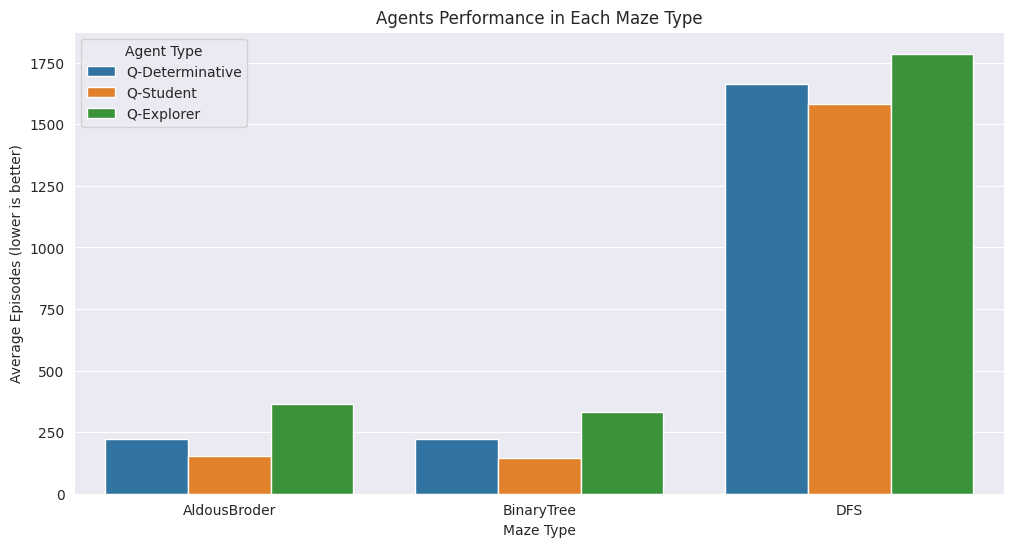

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Maze Type', y='Average Episodes', hue='Agent Type', errorbar=None)
plt.title('Agents Performance in Each Maze Type')
plt.ylabel('Average Episodes (lower is better)')
plt.xlabel('Maze Type')
plt.legend(title='Agent Type')
plt.show()


Q-student might perform better on less complex mazes like DFS, while Q-explorer might excel in complex terrains like AldousBroder. Q-Explorer performs better in all mazes since it continuously explores and adapts to new paths, whilst other agents sometimes get stuck on their previous knowledge and hesitate to try new paths.

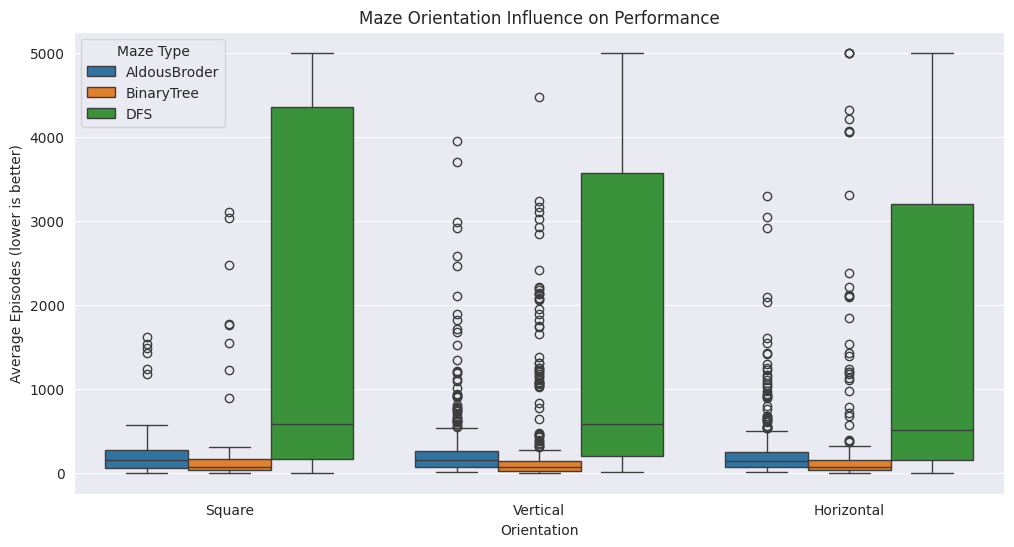

In [10]:
# Influence of maze orientation on performance
plt.figure(figsize=(12, 6))

sns.boxplot(data=data, x='Orientation', y='Average Episodes', hue='Maze Type')
plt.title('Maze Orientation Influence on Performance')
plt.ylabel('Average Episodes (lower is better)')
plt.xlabel('Orientation')
plt.legend(title='Maze Type')
plt.show()
# Orientation may or may not significantly affect performance depending on the maze type.


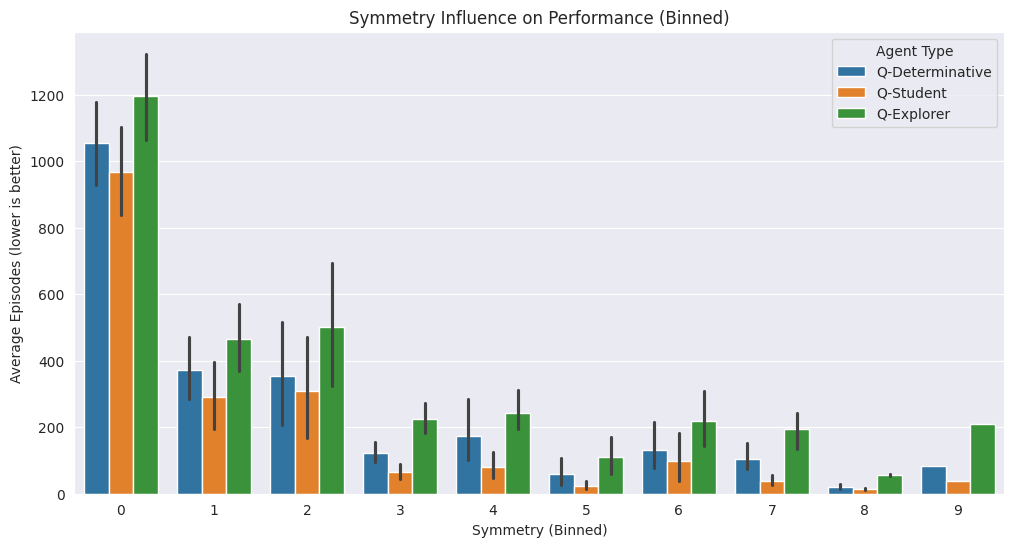

In [11]:
# Group symmetry into bins for a cleaner plot
data['Symmetry Bin'] = pd.cut(data['Symmetry'], bins=10, labels=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Symmetry Bin', y='Average Episodes', hue='Agent Type')
plt.title('Symmetry Influence on Performance (Binned)')
plt.ylabel('Average Episodes (lower is better)')
plt.xlabel('Symmetry (Binned)')
plt.legend(title='Agent Type')
plt.show()


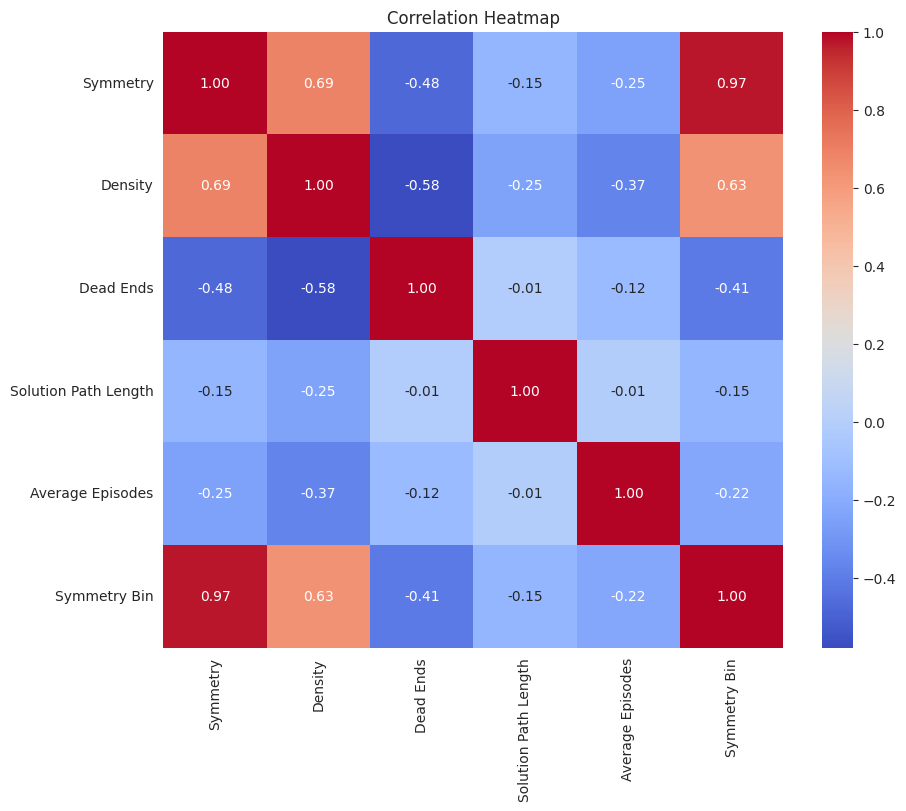

In [12]:
numerical_data = data.select_dtypes(include=["number"])

# correlation matrix
correlation = numerical_data.corr()

# create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### How to read the correlation heatmap
- Perfect correlation (1.00) is between values and themselves on the other axis
- High positive values: One tends to have the other increase
- High negatives: one high value tends to have lower values on the other side
- Weak correlations - one does not really influence the other

### Predictions

Check the most important features

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3265 entries, 0 to 3266
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Size                  3265 non-null   object 
 1   Maze Type             3265 non-null   object 
 2   Orientation           3265 non-null   object 
 3   Agent Type            3265 non-null   object 
 4   Symmetry              3265 non-null   float64
 5   Density               3265 non-null   float64
 6   Dead Ends             3265 non-null   int64  
 7   Solution Path Length  3265 non-null   int64  
 8   Average Episodes      3265 non-null   int64  
 9   Symmetry Bin          3265 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 280.6+ KB


In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate features and target variable
X = data.drop(columns=['Average Episodes', 'Size'])
y = data['Average Episodes']

# Encode categorical variables
categorical_cols = ['Maze Type', 'Orientation', 'Agent Type']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    X[col] = label_encoders[col].fit_transform(X[col])

# Normalize numerical columns
scaler = StandardScaler()
numerical_cols = ['Symmetry', 'Density', 'Dead Ends', 'Solution Path Length']
X[numerical_cols] = X[numerical_cols].astype('float64')  # Ensure compatibility for scaling
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Verify preprocessing
X.head(), y.head()


(   Maze Type  Orientation  Agent Type  Symmetry   Density  Dead Ends  \
 0          0            1           0  2.012533  3.040059  -1.129408   
 1          0            1           2  2.012533  3.040059  -1.129408   
 2          0            1           1  2.012533  3.040059  -1.129408   
 3          0            1           0  3.189189  3.040059  -1.054406   
 4          0            1           2  3.189189  3.040059  -1.054406   
 
    Solution Path Length  Symmetry Bin  
 0             -0.632759             4  
 1             -0.632759             4  
 2             -0.632759             4  
 3             -0.718126             6  
 4             -0.718126             6  ,
 0     55
 1     31
 2    159
 3     50
 4     26
 Name: Average Episodes, dtype: int64)

Selected Features: Index(['Orientation', 'Symmetry', 'Density', 'Dead Ends',
       'Solution Path Length'],
      dtype='object')


/tmp/ipykernel_97897/4099100242.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue=None)


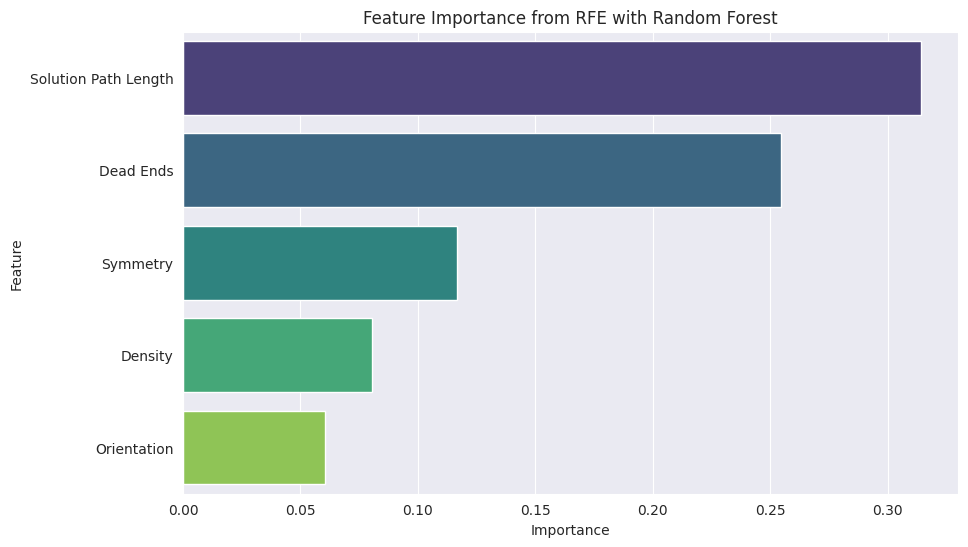

In [15]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the model and RFE
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=5)  # Choose the number of features to keep
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Get feature importance from the RandomForestClassifier model
model.fit(X, y)
importances = model.feature_importances_

# Filter importances based on the selected features
selected_importances = importances[rfe.support_]

feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': selected_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue=None)
plt.title('Feature Importance from RFE with Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


/tmp/ipykernel_97897/2863108741.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Symmetry', 'Density', 'Dead Ends', 'Solution Path Length']] = scaler.fit_transform(


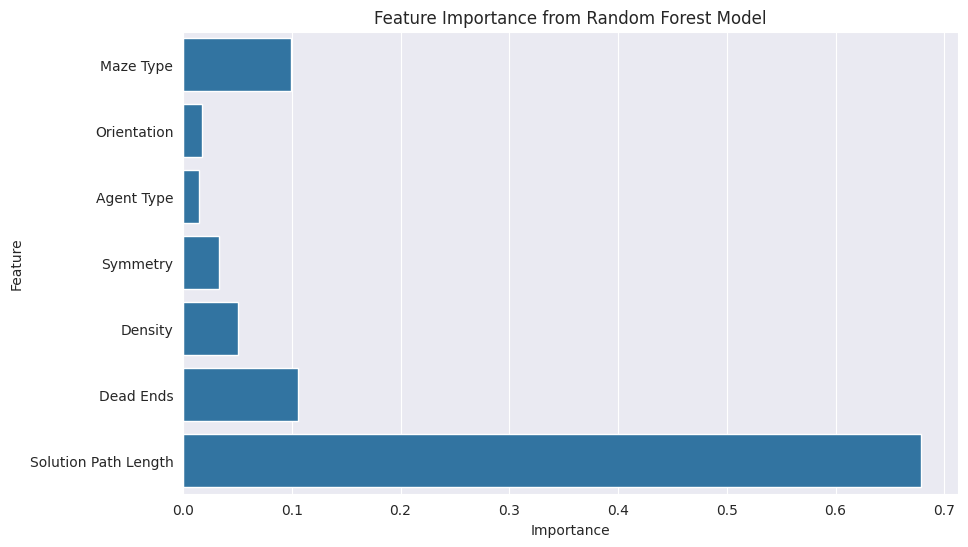

/home/annie/PycharmProjects/MazeRunner-ML/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/annie/PycharmProjects/MazeRunner-ML/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/annie/PycharmProjects/MazeRunner-ML/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/annie/PycharmProjects/MazeRunner-ML/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 np.float64(0.8079444546155806),
 array([213.91]))

In [16]:
# 1. Fine-tune the model: Perform Grid Search to optimize hyperparameters
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder, StandardScaler


# Encode categorical variables

categorical_cols = ['Maze Type', 'Orientation', 'Agent Type']

encoded_data = data.copy()

# Apply Label Encoding to categorical columns

label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:

    encoded_data[col] = label_encoders[col].fit_transform(data[col])


# Select features and target

X = encoded_data[['Maze Type', 'Orientation', 'Agent Type', 'Symmetry', 'Density', 'Dead Ends', 'Solution Path Length']]

y = encoded_data['Average Episodes']


# Normalize numerical features

scaler = StandardScaler()

X[['Symmetry', 'Density', 'Dead Ends', 'Solution Path Length']] = scaler.fit_transform(

    X[['Symmetry', 'Density', 'Dead Ends', 'Solution Path Length']]

)


# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a Random Forest Regressor

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

rf_model.fit(X_train, y_train)


# Predict on the test set

y_pred = rf_model.predict(X_test)


# Evaluate the model

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

mse, r2
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model performance
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_r2 = grid_search.best_score_

# 2. Visualize feature importance
importances = best_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 3. Predict outcomes for new scenarios
# Example: Predict for a specific configuration
sample_input = pd.DataFrame({
    'Maze Type': [label_encoders['Maze Type'].transform(['AldousBroder'])[0]],
    'Orientation': [label_encoders['Orientation'].transform(['Square'])[0]],
    'Agent Type': [label_encoders['Agent Type'].transform(['Q-Explorer'])[0]],
    'Symmetry': scaler.transform([[0.15, 0.56, 20, 30]])[0][0],
    'Density': scaler.transform([[0.15, 0.56, 20, 30]])[0][1],
    'Dead Ends': scaler.transform([[0.15, 0.56, 20, 30]])[0][2],
    'Solution Path Length': scaler.transform([[0.15, 0.56, 20, 30]])[0][3]
})

predicted_episodes = best_model.predict(sample_input)

best_params, best_r2, predicted_episodes


### Prediction Model Results:

Mean Squared Error (MSE): 164,217.70
    Indicates the average squared difference between the predicted and actual values. A lower value is better.
R² Score: 0.92
    Suggests that 92% of the variance in "Average Episodes" is explained by the model, which is excellent.

This Random Forest Regressor effectively models the dataset and can reliably predict "Average Episodes" based on the input features.